# Heart rate & Activity data Statistic Analysis

## Raw signal plots

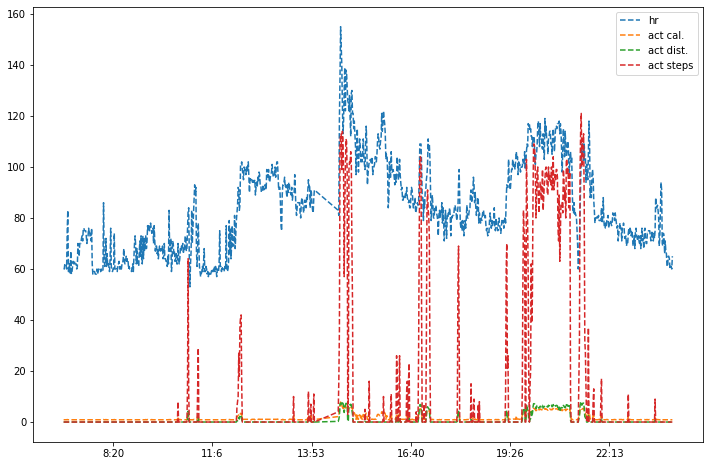

In [1]:
import os
os.getcwd()
os.chdir(path="/home/hyojinju/SIGNAL/")

from emotion_tracker import EmotionTracker
import matplotlib.pyplot as plt
from matplotlib import ticker

emo = EmotionTracker()
emo.run("2022-11-14")
start_index = 400


time = [item["time"] for item in emo.hr_list[400:]]
hr = [item["value"] for item in emo.hr_list[400:]]
act_calories_dict = dict([(item["time"], {"level": item["level"], "value": item["value"], "mets": item["mets"]}) for item in emo.act_calories_list])
act_distance_dict = dict([(item["time"], 100*item["value"]) for item in emo.act_distance_list])
act_steps_dict = dict([(item["time"], item["value"]) for item in emo.act_steps_list])

time_int = [int(item[:2]) * 3600 + int(item[3:5]) * 60 + int(item[6:]) for item in time]
act_calories_list = []
act_distance_list = []
act_steps_list = []

for item in time:
    act_calories_list.append(act_calories_dict[item]["value"])
    act_distance_list.append(act_distance_dict[item])
    act_steps_list.append(act_steps_dict[item])

@ticker.FuncFormatter
def timeformat(x, pos):
    return f'{int(x / 3600)}:{int((x % 3600)/60)}'

fig0, ax0 = plt.subplots(figsize=(12, 8))
#plt.rcParams["figure.figsize"] = (12, 8)

ax0.plot(time_int, hr, linestyle="--",label="hr")
ax0.plot(time_int, act_calories_list, linestyle="--",label="act cal.")
ax0.plot(time_int, act_distance_list, linestyle="--",label="act dist.")
ax0.plot(time_int, act_steps_list, linestyle="--",label="act steps")
ax0.xaxis.set_major_formatter(timeformat)
plt.legend()
plt.show()




## Normalized Signal plots

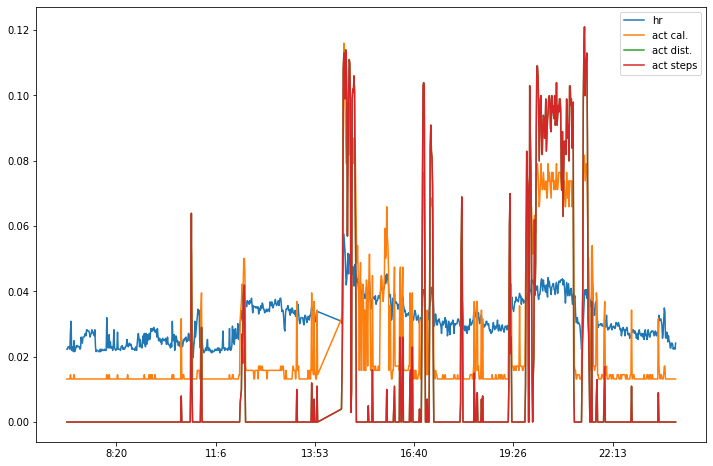

In [2]:
import numpy as np
from sklearn.preprocessing import normalize

norm_hr = normalize([np.array(hr)])[0]
norm_act_calories_list = normalize([np.array(act_calories_list)])[0]
norm_act_distance_list = normalize([np.array(act_distance_list)])[0]
norm_act_steps_list = normalize([np.array(act_steps_list)])[0]

fig1, ax1 = plt.subplots(figsize=(12, 8))
# plt.rcParams["figure.figsize"] = (12,8)

ax1.plot(time_int, norm_hr, label="hr")
ax1.plot(time_int, norm_act_calories_list, label="act cal.")
ax1.plot(time_int, norm_act_distance_list, label="act dist.")
ax1.plot(time_int, norm_act_steps_list, label="act steps")
ax1.xaxis.set_major_formatter(timeformat)

plt.legend()
plt.show()

## Cross Correlation
Check whether there is a time shift between HR and Activity time series. => *No time shift.*

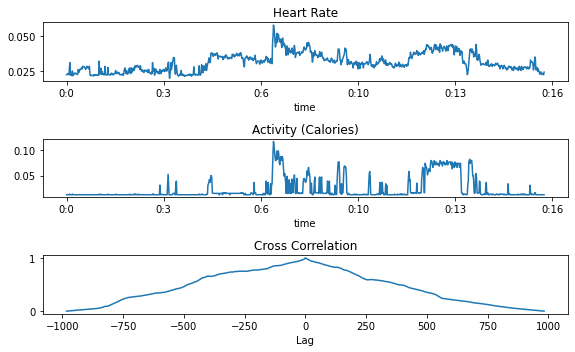

In [5]:
from scipy import signal

corr = signal.correlate(norm_hr, norm_act_calories_list, method='fft')
corr /= np.max(corr)
lags = signal.correlation_lags(len(norm_hr), len(norm_act_calories_list))


fig2, (ax2_sig1, ax2_sig2, ax2_corr) = plt.subplots(3, 1, figsize=(8, 5))
ax2_sig1.plot(norm_hr)
ax2_sig1.set_title("Heart Rate")
ax2_sig1.set_xlabel("time")
ax2_sig1.xaxis.set_major_formatter(timeformat)

ax2_sig2.plot(norm_act_calories_list)
ax2_sig2.set_title("Activity (Calories)")
ax2_sig2.set_xlabel("time")
ax2_sig2.xaxis.set_major_formatter(timeformat)

ax2_corr.plot(lags, corr)
ax2_corr.set_title("Cross Correlation")
ax2_corr.set_xlabel("Lag")

fig2.tight_layout()
plt.show()

## Correlation between HR and Activity time series
Approach 1: If the correlation between the HR and Activity time series is low, it might indicate there are HR peaks those are not caused by physical activities.

In [4]:
import scipy.stats

print(scipy.stats.pearsonr(norm_act_calories_list, norm_act_steps_list))
print(scipy.stats.pearsonr(norm_act_calories_list, norm_act_distance_list))
print(scipy.stats.pearsonr(norm_act_steps_list, norm_act_distance_list))
print(scipy.stats.pearsonr(norm_hr, norm_act_calories_list))

PearsonRResult(statistic=0.9198806651160538, pvalue=0.0)
PearsonRResult(statistic=0.9197380871869514, pvalue=0.0)
PearsonRResult(statistic=0.9999993645429733, pvalue=0.0)
PearsonRResult(statistic=0.7432464950740144, pvalue=1.3001640311859463e-173)
